In [50]:
import torch
import numpy as np
from PIL import Image
import tqdm

from torchvision import transforms
from sxmreader import SXMReader
import matplotlib.pyplot as plt

In [35]:
model = torch.hub.load('mateuszbuda/brain-segmentation-pytorch', 'unet',
    in_channels=3, out_channels=1, init_features=32, pretrained=True)

Using cache found in /home/a/as/asai/.cache/torch/hub/mateuszbuda_brain-segmentation-pytorch_master


In [17]:
n_range = range(368, 408)
SXM_PATH = ["electromigration_26/Image_{0:03}.sxm".format(i) for i in n_range]
frames = SXMReader(SXM_PATH)


In [91]:
n_range = range(368, 408)
SXM_PATH = ["electromigration_26/Image_{0:03}.sxm".format(i) for i in n_range]

In [93]:
with open('listfile.txt', 'w') as filehandle:
    for listitem in SXM_PATH:
        filehandle.write('%s\n' % listitem)

In [21]:
print(frames[0].shape)

(256, 256)


In [84]:
input_image = np.array([frames[5] for i in range(0,3)])
input_image.resize((256,256,3))
input_image = input_image.astype(np.double)

In [85]:
m, s = np.mean(input_image, axis=(0, 1)), np.std(input_image, axis=(0, 1))
preprocess = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=m, std=s),
])
input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0)

model.double()
if torch.cuda.is_available():
    input_batch = input_batch.to('cuda')
    model = model.to('cuda')

with torch.no_grad():
    output = model(input_batch)

print(torch.round(output[0]))

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 1., 1.],
         [0., 0., 0.,  ..., 0., 1., 1.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]], dtype=torch.float64)


In [90]:
output.numpy()[0][0]

array([[1.30894260e-04, 3.24484996e-04, 1.87491371e-04, ...,
        4.49311327e-04, 5.37821016e-02, 4.00390366e-03],
       [2.74734481e-04, 2.06212584e-03, 2.26961313e-03, ...,
        1.05422957e-02, 9.99999888e-01, 9.99990438e-01],
       [8.75298709e-05, 9.95075694e-05, 1.20409325e-04, ...,
        5.26497699e-03, 9.99995049e-01, 9.99970596e-01],
       ...,
       [4.81890102e-05, 5.69880723e-05, 3.33464783e-05, ...,
        6.55267211e-03, 8.72402011e-04, 2.17884937e-04],
       [2.96663187e-05, 4.16141621e-05, 2.60773526e-05, ...,
        1.38913908e-01, 5.13497672e-03, 2.40619245e-04],
       [1.84915924e-05, 1.59857785e-05, 1.42535135e-05, ...,
        3.77607110e-04, 2.62204152e-04, 7.09733280e-05]])

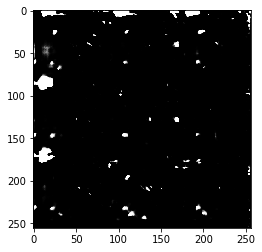

In [87]:

plt.imshow(output.numpy()[0][0], cmap='gray')

# arr = np.ndarray(oupu)#This is your tensor
# arr_ = np.squeeze(arr) # you can give axis attribute if you wanna squeeze in specific dimension
# plt.imshow(arr_)
# plt.show()

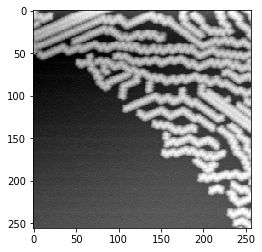

In [88]:
plt.imshow(frames[0], cmap='gray')
